###  Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

### Load & Prepare Dataset 

In [2]:
# Creating a sample dataset 
data = { 
    'Horsepower': [130, 250, 190, 300, 210, 150, 170, 190, 200, 220], 
    'Mileage': [50000, 20000, 35000, 10000, 25000, 60000, 45000, 32000, 28000, 22000], 
    'Age': [5, 2, 3, 1, 3, 6, 5, 4, 2, 3], 
    'Price': [15000, 35000, 24000, 45000, 32000, 12000, 18000, 25000, 29000,31000] 
       } 
df = pd.DataFrame(data) 
 
# Splitting Features (X) and Target Variable (y) 
X = df[['Horsepower', 'Mileage', 'Age']] 
y = df['Price'] 
 
# Splitting into Training and Testing Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Regression Models

#### (A) Linear Regression

In [3]:
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train) 
y_pred_lr = lr_model.predict(X_test)

#### (B) Polynomial Regression

In [4]:
poly = PolynomialFeatures(degree=2) 
X_poly_train = poly.fit_transform(X_train) 
X_poly_test = poly.transform(X_test) 
 
poly_model = LinearRegression() 
poly_model.fit(X_poly_train, y_train) 
y_pred_poly = poly_model.predict(X_poly_test) 

#### (C) Ridge & Lasso Regression

In [5]:
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train) 
y_pred_ridge = ridge_model.predict(X_test) 
 
lasso_model = Lasso(alpha=1.0) 
lasso_model.fit(X_train, y_train) 
y_pred_lasso = lasso_model.predict(X_test)

#### (D) Decision Tree Regression 

In [6]:
dt_model = DecisionTreeRegressor() 
dt_model.fit(X_train, y_train) 
y_pred_dt = dt_model.predict(X_test)

#### (E) Random Forest Regression

In [7]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train) 
y_pred_rf = rf_model.predict(X_test) 

###  Model Evaluation

In [8]:
models = { 
    "Linear Regression": y_pred_lr, 
    "Polynomial Regression": y_pred_poly, 
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso, 
    "Decision Tree Regression": y_pred_dt, 
    "Random Forest Regression": y_pred_rf 
} 
 
for name, pred in models.items(): 
    print(f"\n{name}:") 
    print("R² Score:", r2_score(y_test, pred)) 
    print("MSE:", mean_squared_error(y_test, pred)) 
    print("MAE:", mean_absolute_error(y_test, pred)) 


Linear Regression:
R² Score: 0.9200106679256925
MSE: 719903.9886687677
MAE: 747.7398184000776

Polynomial Regression:
R² Score: -3.977908379133676
MSE: 44801175.41220308
MAE: 5639.3806490399365

Ridge Regression:
R² Score: 0.9388053479715289
MSE: 550751.8682562397
MAE: 597.1146473257759

Lasso Regression:
R² Score: 0.9205496554944528
MSE: 715053.1005499251
MAE: 742.793692781237

Decision Tree Regression:
R² Score: -5.944444444444445
MSE: 62500000.0
MAE: 7500.0

Random Forest Regression:
R² Score: 0.9191
MSE: 728100.0
MAE: 840.0


###  Visualizing Results

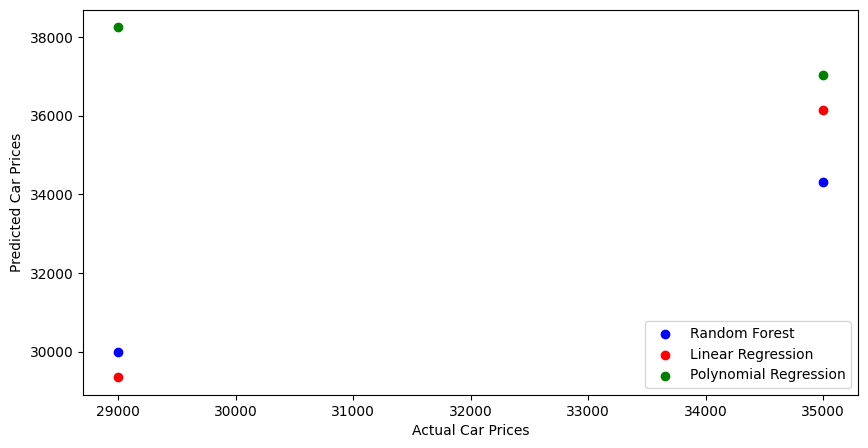

In [9]:
plt.figure(figsize=(10, 5)) 
plt.scatter(y_test, y_pred_rf, color='blue', label="Random Forest") 
plt.scatter(y_test, y_pred_lr, color='red', label="Linear Regression") 
plt.scatter(y_test, y_pred_poly, color='green', label="Polynomial Regression") 
plt.xlabel("Actual Car Prices") 
plt.ylabel("Predicted Car Prices") 
plt.legend() 
plt.show()